In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Loaded CSV
df = pd.read_csv('/content/ Social Media.csv')
df.head(10)


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
7,8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
8,9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data
9,10,28,Other,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,2:00 PM,8,2,At home,Mobile Data


# Preprocessing : Data Type conversion and Time standardisation

In [25]:
# Striping of  whitespace
df.columns = df.columns.str.strip()
df.drop(['UserID', 'Debt', 'Owns Property', 'Number of Sessions', 'Video ID', 'Engagement', 'Importance Score', 'Scroll Rate', 'OS', 'CurrentActivity' ], axis=1, inplace=True)


# Converting Watch Time into datetime
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p', errors='coerce')

# Checking conversion
print("Non-convertible 'Watch Time' entries:")
print(df[df['Watch Time'].isnull()])

df.head(30)

Non-convertible 'Watch Time' entries:
Empty DataFrame
Columns: [Age, Gender, Location, Income, Profession, Demographics, Platform, Total Time Spent, Video Category, Video Length, Time Spent On Video, Number of Videos Watched, Frequency, ProductivityLoss, Satisfaction, Watch Reason, DeviceType, Watch Time, Self Control, Addiction Level, ConnectionType]
Index: []

[0 rows x 21 columns]


,Age,Gender,Location,Income,Profession,Demographics,Platform,Total Time Spent,Video Category,Video Length,...,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,Watch Time,Self Control,Addiction Level,ConnectionType
0,56,Male,Pakistan,82812,Engineer,Rural,Instagram,80,Pranks,24,...,22,Night,3,7,Procrastination,Smartphone,1900-01-01 21:00:00,5,5,Mobile Data
1,46,Female,Mexico,27999,Artist,Urban,Instagram,228,Pranks,19,...,31,Afternoon,5,5,Habit,Computer,1900-01-01 17:00:00,7,3,Wi-Fi
2,32,Female,United States,42436,Engineer,Rural,Facebook,30,Vlogs,19,...,7,Evening,6,4,Entertainment,Tablet,1900-01-01 14:00:00,8,2,Mobile Data
3,60,Male,Barzil,62963,Waiting staff,Rural,YouTube,101,Vlogs,4,...,41,Night,3,7,Habit,Smartphone,1900-01-01 21:00:00,5,5,Mobile Data
4,25,Male,Pakistan,22096,Manager,Urban,TikTok,136,Gaming,19,...,21,Morning,8,2,Boredom,Smartphone,1900-01-01 08:00:00,10,0,Mobile Data
5,38,Male,Vietnam,45279,driver,Urban,Instagram,89,Jokes/Memes,9,...,16,Night,3,7,Entertainment,Computer,1900-01-01 21:00:00,5,5,Wi-Fi
6,56,Male,India,46201,Students,Rural,TikTok,247,Vlogs,16,...,20,Morning,8,2,Habit,Smartphone,1900-01-01 08:00:00,10,0,Wi-Fi
7,36,Male,Barzil,39715,Engineer,Rural,Instagram,191,Entertainment,27,...,43,Night,3,7,Entertainment,Tablet,1900-01-01 21:00:00,5,5,Mobile Data
8,40,Male,United States,49309,Waiting staff,Rural,Instagram,34,Vlogs,4,...,44,Night,3,7,Entertainment,Computer,1900-01-01 21:00:00,5,5,Mobile Data
9,28,Other,United States,35078,Students,Rural,YouTube,165,ASMR,6,...,47,Evening,6,4,Boredom,Smartphone,1900-01-01 14:00:00,8,2,Mobile Data


# Exploratory Data Analysis (EDA)

    

# 1.  Histogram for numerical values







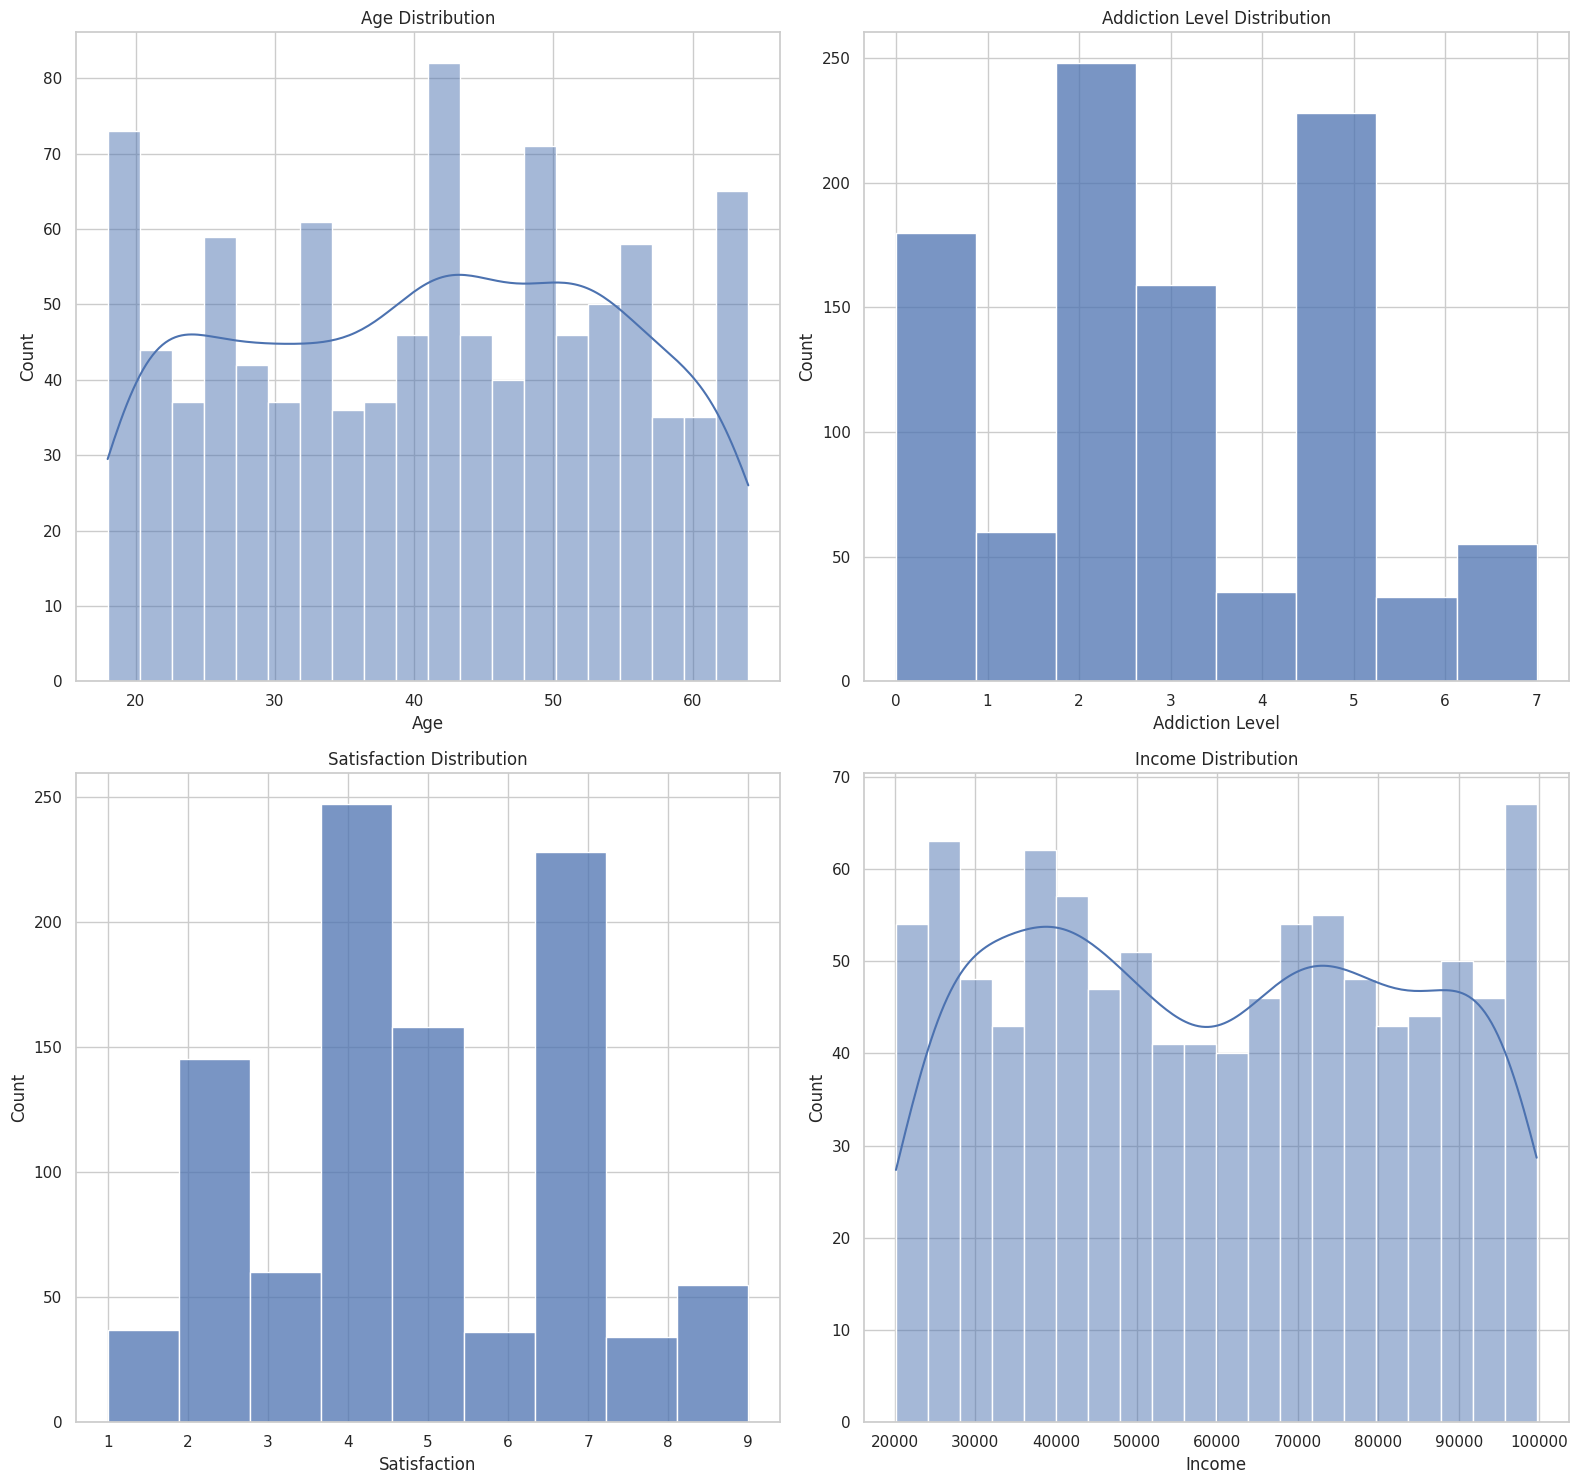

In [26]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 15))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0]).set_title("Age Distribution")
sns.histplot(df['Addiction Level'], bins=8, kde=False, ax=axes[0, 1]).set_title("Addiction Level Distribution")
sns.histplot(df['Satisfaction'], bins=9, kde=False, ax=axes[1, 0]).set_title("Satisfaction Distribution")
sns.histplot(df['Income'], bins=20, kde=True, ax=axes[1, 1]).set_title("Income Distribution")

plt.tight_layout()
plt.show()



# 2.  Countplot for all the key  categorical values






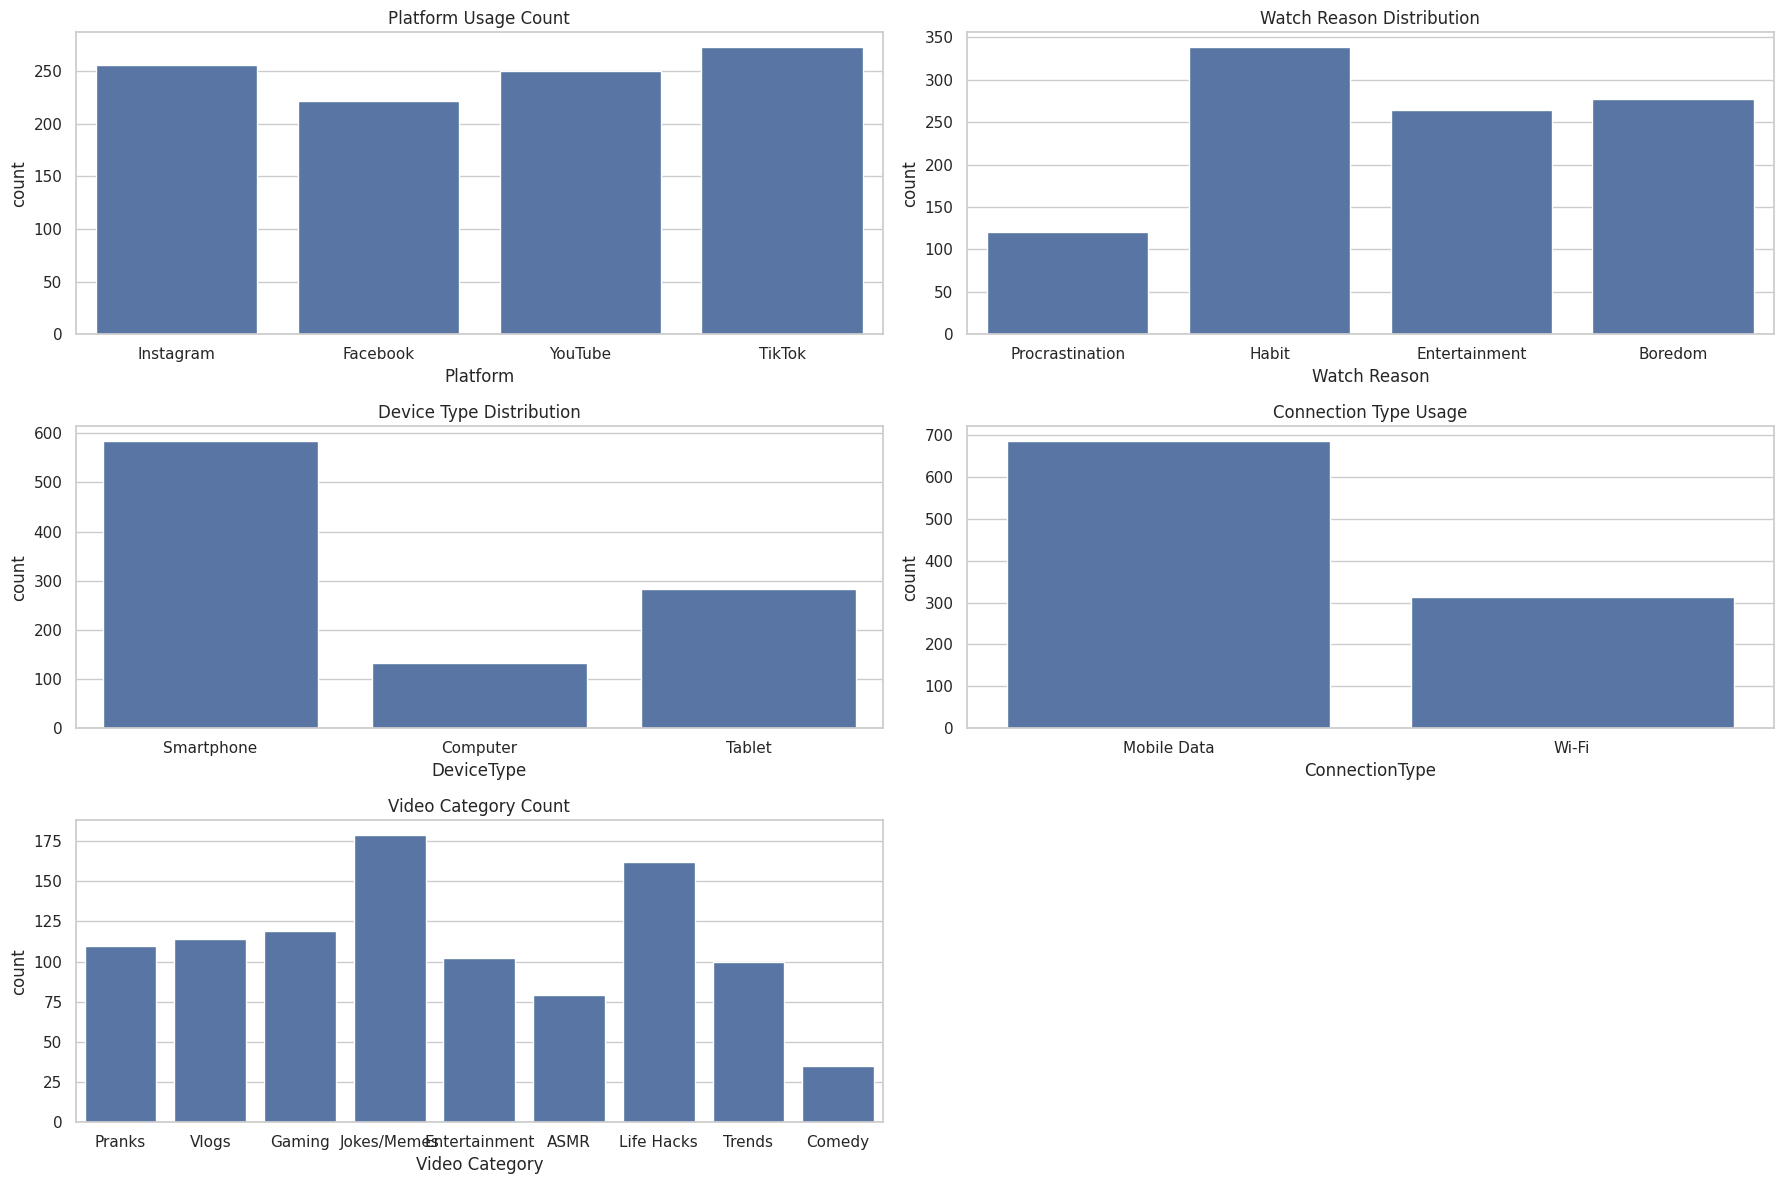

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

sns.countplot(data=df, x='Platform', ax=axes[0, 0]).set_title("Platform Usage Count")
sns.countplot(data=df, x='Watch Reason', ax=axes[0, 1]).set_title("Watch Reason Distribution")
sns.countplot(data=df, x='DeviceType', ax=axes[1, 0]).set_title("Device Type Distribution")
sns.countplot(data=df, x='ConnectionType', ax=axes[1, 1]).set_title("Connection Type Usage")
sns.countplot(data=df, x='Video Category', ax=axes[2, 0]).set_title("Video Category Count")

fig.delaxes(axes[2, 1])


plt.tight_layout()
plt.show()


# Correlation matrix:  used to measure linear relationship between variables

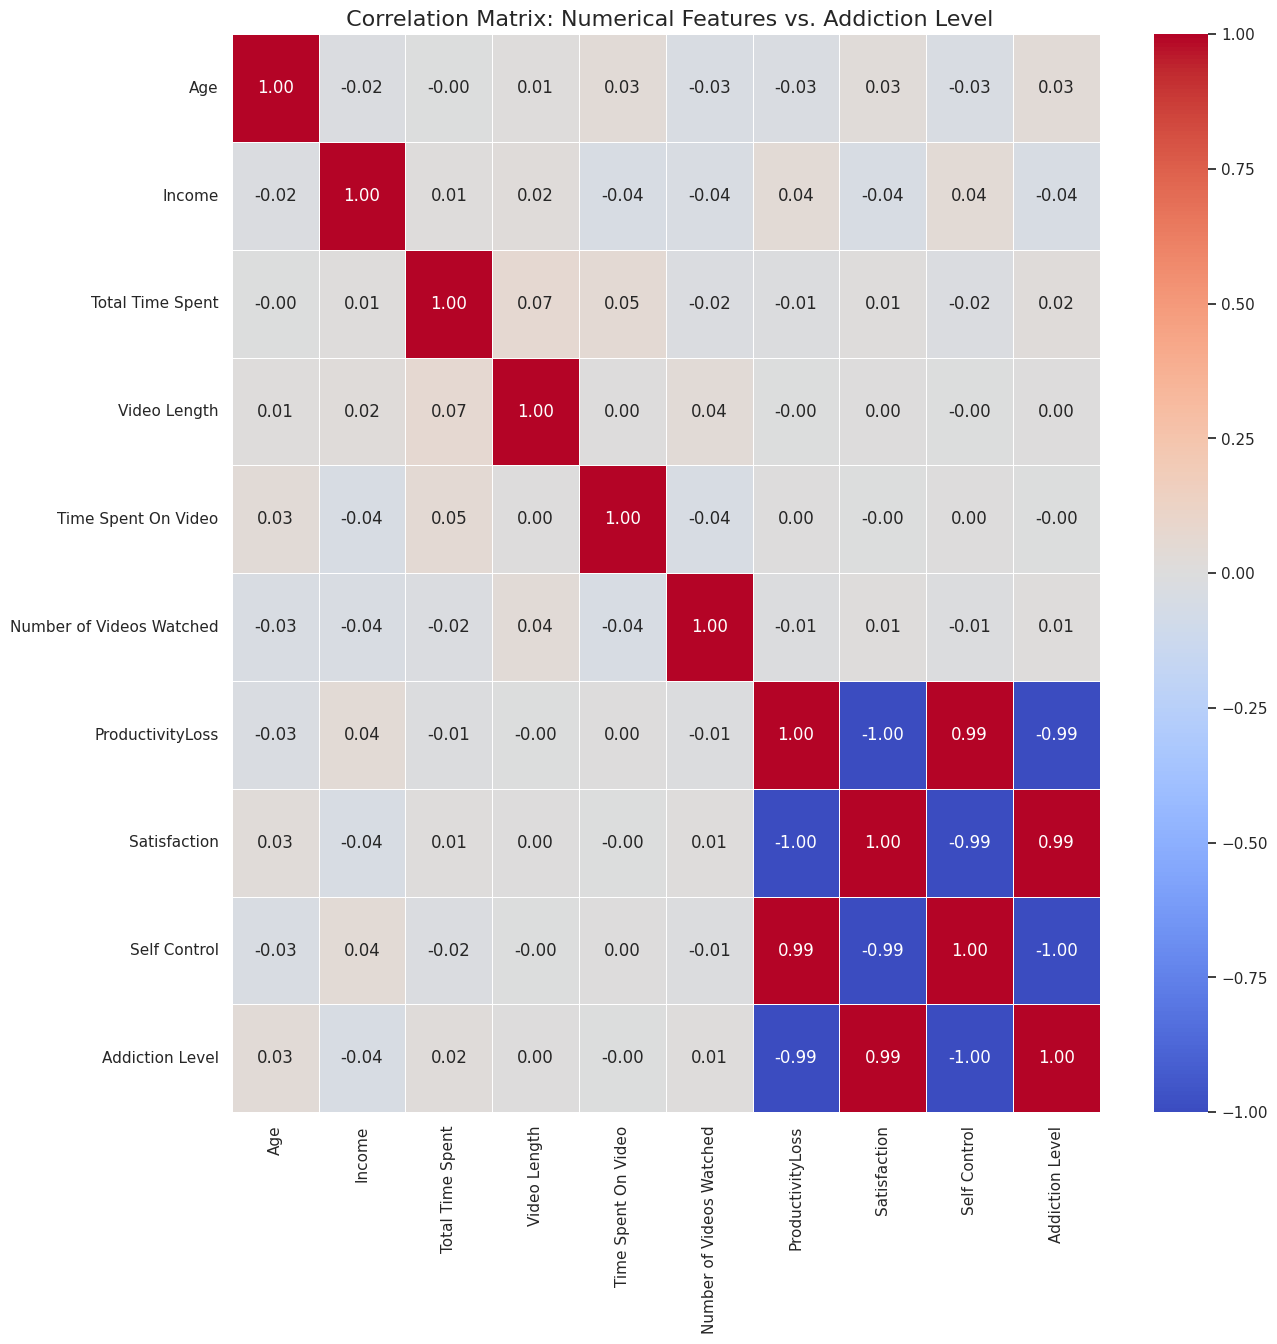

In [28]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Computing correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=False, linewidths=0.5)
plt.title(" Correlation Matrix: Numerical Features vs. Addiction Level", fontsize=16)
plt.show()



# **ML Model :** Predicting addiction level (0-7) using **Random forest regressor**

In [29]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor

def addiction_category(level):
    if level <= 2:
        return "Low"
    elif level <= 5:
        return "Medium"
    else:
        return "High"
df['Addiction_Category'] = df['Addiction Level'].apply(addiction_category)

# Encoding labels
le = LabelEncoder()
y = le.fit_transform(df['Addiction_Category'])

#features
features = ['Self Control', 'Satisfaction', 'ProductivityLoss']
X = df[features].copy()

# Adding Gaussian noise
np.random.seed(42)
for feature in features:
    noise = np.random.normal(loc=0, scale=1, size=len(X))
    X[feature] += noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regularized Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_features='sqrt',
    random_state=42
)

# Bootstrapping
bootstrap_rf_accuracies = []
for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, random_state=200 + i)
    rf_model.fit(X_sample, y_sample)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrap_rf_accuracies.append(acc)

# Report Results
print(" Random Forest ")
print("Mean Accuracy:", round(np.mean(bootstrap_rf_accuracies), 3))
print("Std Deviation:", round(np.std(bootstrap_rf_accuracies), 3))
print("Min Accuracy:", round(np.min(bootstrap_rf_accuracies), 3))
print("Max Accuracy:", round(np.max(bootstrap_rf_accuracies), 3))


 Random Forest 
Mean Accuracy: 0.862
Std Deviation: 0.013
Min Accuracy: 0.83
Max Accuracy: 0.89


# Optimization of Random Forest Regressor using **Grid Search CV**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
}

# GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=2025),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Recalculate RMSE and R²
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\n Optimized Results")
print("RMSE:", round(mse_optimized, 3))
print(" R²:", round(r2_optimized, 3))
print(" Best Parameters:", grid_search.best_params_)



 Optimized Results
RMSE: 0.186
 R²: 0.616
 Best Parameters: {'max_depth': None, 'n_estimators': 150}


# Checking which Attribute contributed the most in predicting addiction levels

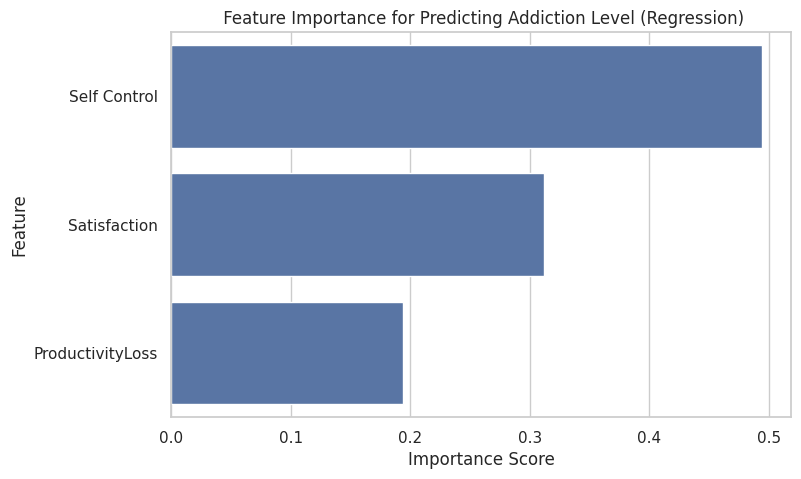

In [31]:
# For optimized model:
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title(" Feature Importance for Predicting Addiction Level (Regression)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Checking how well the model performed using **Scatterplot**

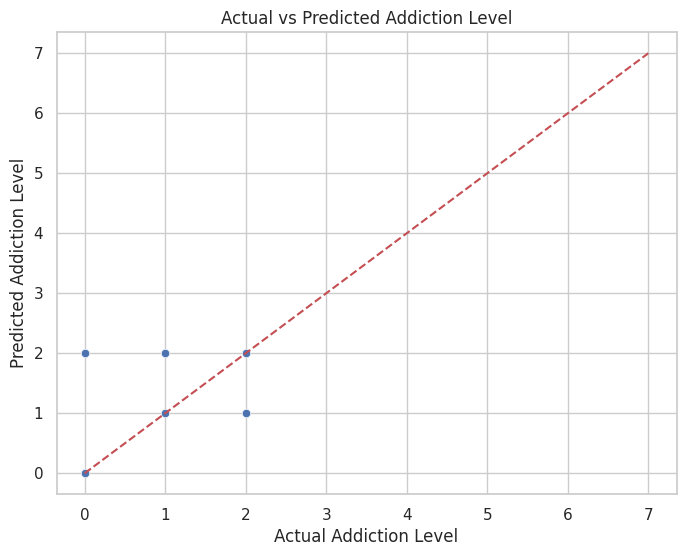

In [32]:
# Visualize actual vs predicted addiction levels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 7], [0, 7], 'r--')
plt.xlabel("Actual Addiction Level")
plt.ylabel("Predicted Addiction Level")
plt.title("Actual vs Predicted Addiction Level")
plt.show()


# Finding out impulsive behavior in medium level users

In [33]:
#  moderate addiction level (4 - 5)
df_subset = df[df['Addiction Level'].between(4, 5)]

# Defining thresholds
high_video_count = df['Number of Videos Watched'].quantile(0.75)   # Top 25% binge watchers
low_time_per_video = df['Time Spent On Video'].quantile(0.25)     # Bottom 25% attention span
unproductive_reasons = ['boredom', 'procrastination']

# Identifing compulsive users
compulsive_users = df_subset[
    (df_subset['Number of Videos Watched'] > high_video_count) &
    (df_subset['Time Spent On Video'] < low_time_per_video) &
    (df_subset['Watch Reason'].str.lower().isin(unproductive_reasons))
]

# Comparing between two behaviors
print("Behavioral Contradiction Check:")
print(f"Total users with addiction level 4–5: {len(df_subset)}")
print(f"Users showing compulsive patterns (true addicts): {len(compulsive_users)}")

#  Preview those users
compulsive_users[['Addiction Level', 'Number of Videos Watched', 'Time Spent On Video', 'Watch Reason', 'Self Control']]



Behavioral Contradiction Check:
Total users with addiction level 4–5: 264
Users showing compulsive patterns (true addicts): 6


,Addiction Level,Number of Videos Watched,Time Spent On Video,Watch Reason,Self Control
22,5,48,2,Boredom,5
334,5,48,3,Boredom,5
336,5,49,6,Procrastination,5
761,5,45,7,Procrastination,5
777,5,41,3,Procrastination,5
952,5,48,4,Boredom,5


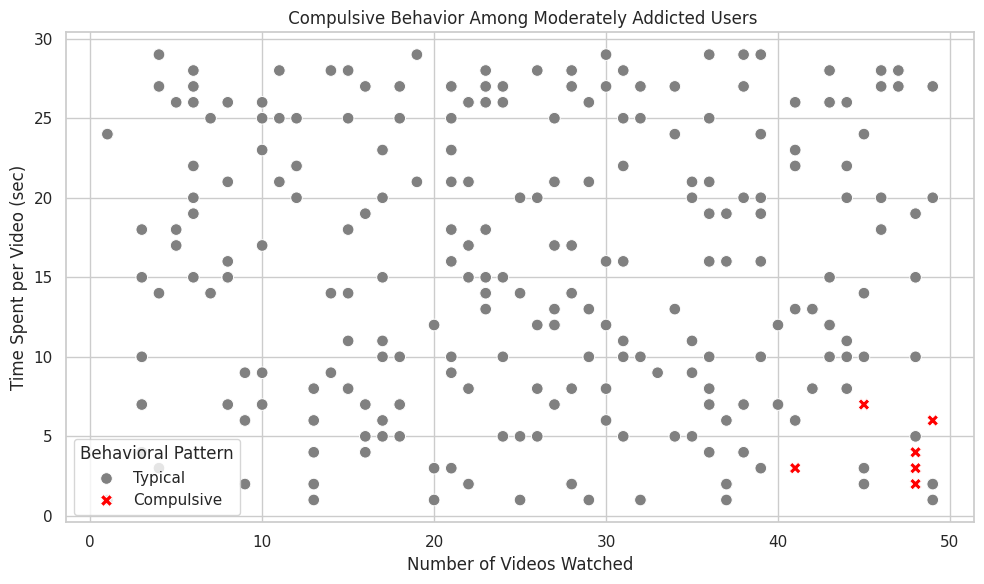

In [34]:
#  Mark users for visualisation
df['behavioral_type'] = 'Typical'
df.loc[compulsive_users.index, 'behavioral_type'] = 'Compulsive'

#  Visualise users in addiction level 4–5
df_mid_addiction = df[df['Addiction Level'].between(4, 5)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_mid_addiction,
    x='Number of Videos Watched',
    y='Time Spent On Video',
    hue='behavioral_type',
    style='behavioral_type',
    palette={'Typical': 'gray', 'Compulsive': 'red'},
    s=70
)

plt.title(" Compulsive Behavior Among Moderately Addicted Users")
plt.xlabel("Number of Videos Watched")
plt.ylabel("Time Spent per Video (sec)")
plt.legend(title="Behavioral Pattern")
plt.grid(True)
plt.tight_layout()
plt.show()


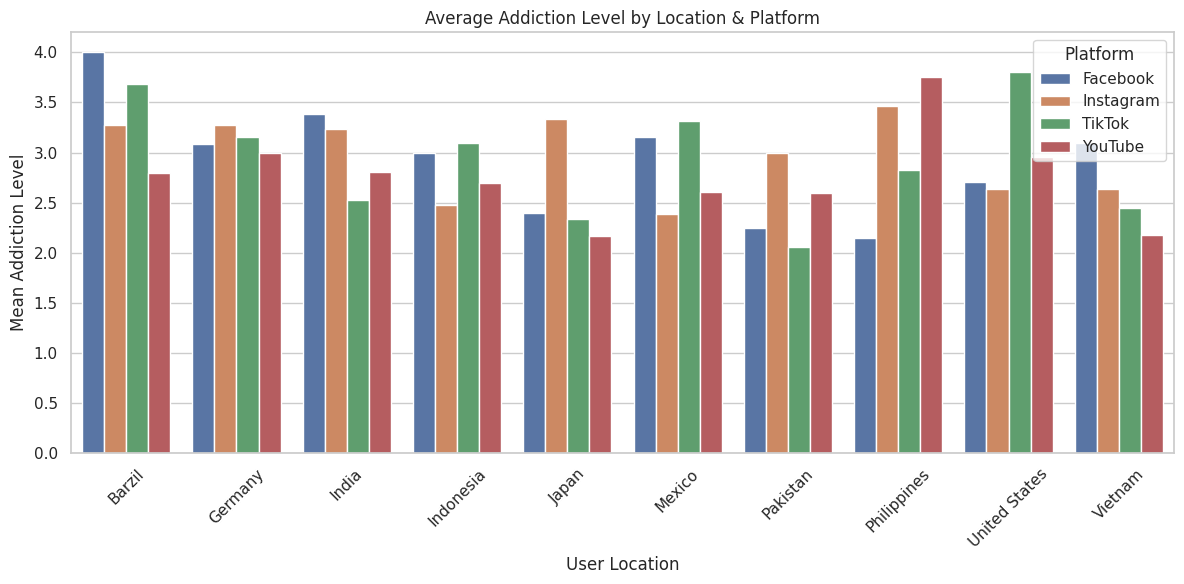

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Location and Platform
grouped = df.groupby(['Location', 'Platform'])['Addiction Level'].mean().reset_index()

# Visualize as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Location', y='Addiction Level', hue='Platform')
plt.title("Average Addiction Level by Location & Platform")
plt.ylabel("Mean Addiction Level")
plt.xlabel("User Location")
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


# Behavioral Pattern Discovery Via Association Rule Mining

In [36]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Categorize Addiction
def addiction_category(level):
    if level <= 2: return 'Low'
    elif level <= 5: return 'Medium'
    else: return 'High'
df['addiction_cat'] = df['addiction_level'].apply(addiction_category)

# columns for mining
rules_df = df[['frequency', 'watch_reason', 'addiction_cat']]

# One-hot encode for Apriori
rules_encoded = pd.get_dummies(rules_df)

# Run Apriori
frequent = apriori(rules_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1.1)

# Filtering for rules where addiction is the consequence
addiction_rules = rules[rules['consequents'].astype(str).str.contains('addiction_cat')]
print(addiction_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False))

                                        antecedents  \
7                                 (frequency_Night)   
4                               (frequency_Morning)   
25  (frequency_Evening, watch_reason_Entertainment)   
1                             (frequency_Afternoon)   
15        (watch_reason_Habit, frequency_Afternoon)   
18        (watch_reason_Boredom, frequency_Evening)   
30                              (frequency_Evening)   
27                              (frequency_Evening)   
2                               (frequency_Evening)   
22                              (frequency_Evening)   
17                            (frequency_Afternoon)   
28          (watch_reason_Habit, frequency_Evening)   
33            (frequency_Night, watch_reason_Habit)   
35                                (frequency_Night)   
8                                 (frequency_Night)   
13                   (watch_reason_Procrastination)   
10                           (watch_reason_Boredom)   
37        

In [37]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MinMaxScaler

# Clean data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Inverting self-control
df['inv_self_control'] = 10 - df['self_control']

# Normalised both metrics
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['inv_self_control', 'total_time_spent']])
df[['norm_self_control', 'norm_total_time']] = pd.DataFrame(scaled, columns=['norm_self_control', 'norm_total_time'])

# Behavioral addiction score
df['behavior_addiction_score'] = (df['norm_self_control'] + df['norm_total_time']) / 2

# Categorize addiction
def categorize_behavioral(score):
    if score < 0.33:
        return 'Low'
    elif score < 0.66:
        return 'Medium'
    else:
        return 'High'
df['behavioral_addiction_cat'] = df['behavior_addiction_score'].apply(categorize_behavioral)

# Prepare rules dataset
rules_df = df[['frequency', 'watch_reason', 'behavioral_addiction_cat']]
rules_encoded = pd.get_dummies(rules_df)

# Run Apriori
frequent = apriori(rules_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1.1)

# Filter rules with addiction as outcome
addiction_rules = rules[rules['consequents'].astype(str).str.contains('behavioral_addiction_cat')]

# Show top rules sorted by lift
print(addiction_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False))


                                        antecedents  \
5                                 (frequency_Night)   
2                               (frequency_Morning)   
1                               (frequency_Evening)   
18          (frequency_Night, watch_reason_Boredom)   
15                              (frequency_Evening)   
9                              (watch_reason_Habit)   
7                            (watch_reason_Boredom)   
16  (frequency_Evening, watch_reason_Entertainment)   
13                           (watch_reason_Boredom)   
20                           (watch_reason_Boredom)   
11        (watch_reason_Boredom, frequency_Evening)   

                                          consequents  support  confidence  \
5                     (behavioral_addiction_cat_High)    0.117    0.382353   
2                      (behavioral_addiction_cat_Low)    0.071    0.669811   
1                      (behavioral_addiction_cat_Low)    0.132    0.361644   
18                  (behavi

remove this afterwards qki confusion matrix hai


In [39]:
accuracy = (df['addiction_cat'] == df['behavioral_addiction_cat']).mean() * 100
print(accuracy)

59.0


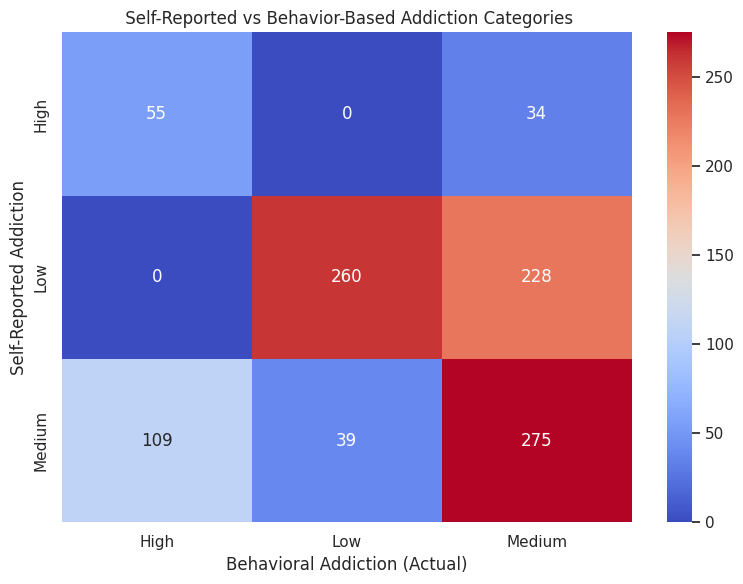

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(comparison.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt='d')
plt.title(" Self-Reported vs Behavior-Based Addiction Categories")
plt.ylabel("Self-Reported Addiction")
plt.xlabel("Behavioral Addiction (Actual)")
plt.tight_layout()
plt.show()


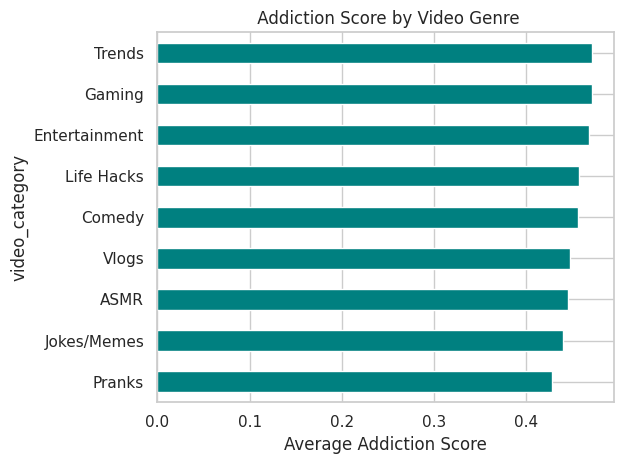

In [41]:
import matplotlib.pyplot as plt

df.groupby('video_category')['behavior_addiction_score'].mean().sort_values().plot(kind='barh', color='teal')
plt.xlabel('Average Addiction Score')
plt.title(' Addiction Score by Video Genre')
plt.tight_layout()
plt.show()
